In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Fraud.csv")

In [ ]:
data.head() # top 5 data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
# check for missing values
data.isnull().values.any()

np.False_

In [ ]:
# drop useless data
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [12]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
# check of missing values again
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# check for duplicate values
data.duplicated().sum()

np.int64(543)

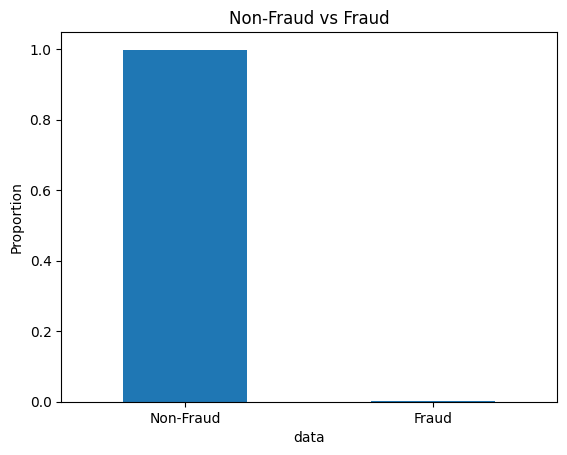

In [17]:
# isFraud distribution
data['isFraud'].value_counts(normalize=True).plot(kind='bar', title='Non-Fraud vs Fraud')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0) 
plt.xlabel("data")
plt.ylabel("Proportion")
plt.show()


In [20]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
# import library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
data['type'] = LabelEncoder().fit_transform(data['type'])


In [28]:
# correlation
corr = data.corr()
corr

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

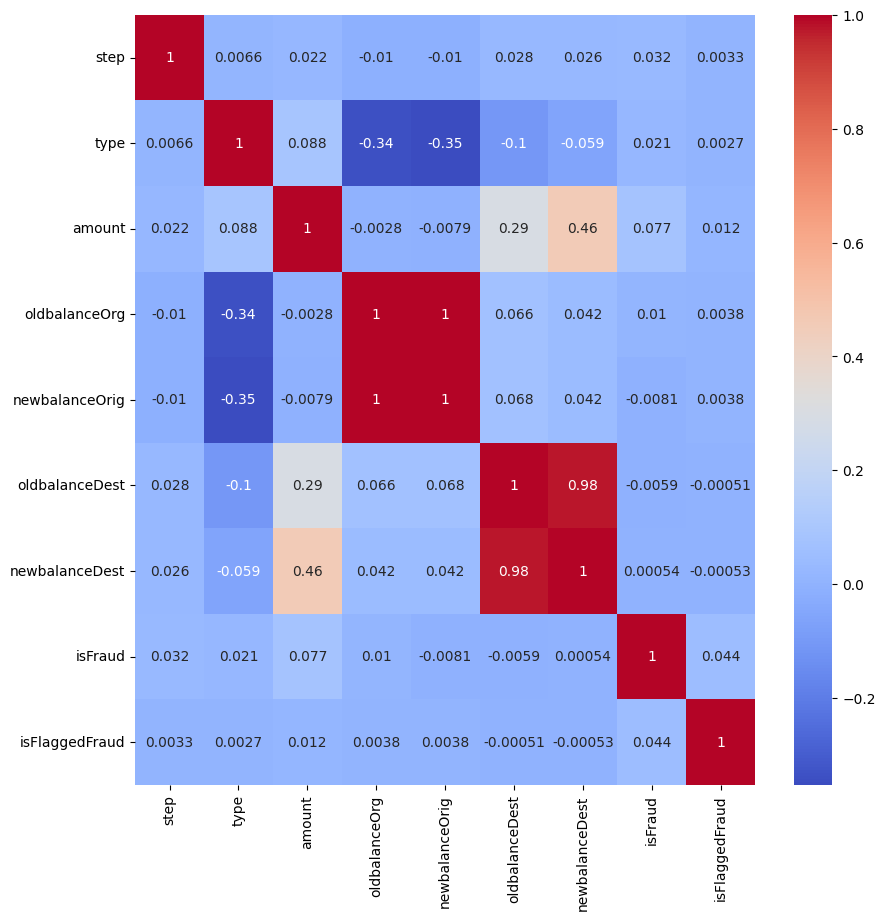

In [32]:
# heatmap of corr
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [35]:
# train test split
x = data.drop(['isFraud', 'isFlaggedFraud'], axis =1)
y = data['isFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [36]:
data.shape

(6362620, 9)

In [37]:
x_train.shape

(4453834, 7)

In [38]:
x_test.shape

(1908786, 7)

In [39]:
y_train.shape

(4453834,)

In [40]:
y_test.shape

(1908786,)

In [41]:
# standardscalar

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train

array([[-0.29063053, -1.26974966, -0.25406699, ..., -0.27391502,
         1.78559902,  1.61057458],
       [-1.45696788, -0.52907109,  0.27402537, ..., -0.29249455,
         0.77356975,  0.77549478],
       [-1.56938593,  1.69296463,  2.79361459, ..., -0.29249455,
         0.65542366,  1.00299524],
       ...,
       [ 0.7492365 , -0.52907109, -0.28094878, ..., -0.27582904,
        -0.22830176, -0.24209209],
       [ 0.44711297, -0.52907109, -0.17728912, ..., -0.29249455,
        -0.24788939, -0.24323644],
       [-0.59275406, -0.52907109, -0.14960173, ..., -0.25609307,
        -0.32315346, -0.30832058]])

In [ ]:
# train model -use RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

#accuracy score
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1. Data cleaning including missing values, outliers and multi-collinearity.
First I checked for missing values and found that there was no null data in the dataset. Then I removed two columns nameOrig and nameDest because they were just user IDs and not useful for model learning purposes. I also checked for duplicate values.
Outliers were not handled manually because models like Random Forest are not affected much by them. For multi-collinearity, I created a correlation heatmap (corr) which helped me to see which features are strongly related. But most of the variables were okay and not highly correlated, so I didn't drop any more features.

2. Describe your fraud detection model in elaboration.
For detecting fraud, I used the Random Forest Classifier. It is a very powerful model that creates many decision trees and combines them to make strong predictions. I used this model because it works well on large datasets 
It also works fine even if there are small issues in data like outliers or small correlations between features.
It gave an accuracy of 0.9999

3. How did you select variables to be included in the model?
I dropped only two columns: nameOrig and nameDest, since they were just strings(type-obj) representing names and can’t help the model learn anything. I also dropped isFlaggedFraud while training because we are trying to predict isFraud, and keeping it can cause data leakage.
Then I label encoded the type column to convert it into numeric form. I kept all the remaining numeric columns for training since they are meaningful like amount, balances before and after the transaction etc.

4. Demonstrate the performance of the model by using best set of tools.
I trained the Random Forest model and then tested it on 30% of the data. For performance, I checked accuracy score.


5. What are the key factors that predict fraudulent customer?
The key factors that help predict fraud were:
type of transaction (like transfer or cash out)
amount of money involved
oldbalanceOrg and newbalanceOrig (balances of sender)
oldbalanceDest and newbalanceDest (balances of receiver)
Fraud transactions often have very specific patterns in these values.

6. Do these factors make sense? If yes, How? If not, How not?
Yes, they totally make sense. In many fraud cases, money is quickly transferred or cashed out in a way that the source account balance becomes zero. Also, the destination account might not really receive money properly.
So looking at balances and transaction type tells a lot about suspicious behavior.

7. What kind of prevention should be adopted while company update its infrastructure?
The company can add some prevention steps like:
Put real-time checks on large transactions.
Use machine learning models to flag suspicious patterns live.
Set limits on transfers or add extra authentication like reCaptcha or national IDs.
Also logging user behavior and applying fraud detection in backend systems will help reduce loss.

8. Assuming these actions have been implemented, how would you determine if they work?
After implementation, I would check if:
The number of fraud cases goes down.
The model is catching more frauds with less false alarms.
Compare results before and after changes using reports and metrics.
Also check feedback from users and system logs to see if fraud attempts are reduced.